<img src="../../images/arm_logo.png" width=250 alt="ARM Logo"></img>

# Surface Qualitative Precipiation Estimate (SQUIRE) Value-added Product

---

## Overview
This is a notebook focused on orienting users to one of ARM's Value-Added Products, SQUIRE! SQUIRE is a product developed to make data from scanning precipitation radars more useful - especially in complex terrain. One key site of opportunity is the Surface Atmosphere Integrated Field Laboratory, which was located near Crested Butte, Colorado. The radar was located in a valley between steep mountain peaks, making precipitation products from the instrument difficult to use.

1. Introduction to SQUIRE
1. How to access the data and load using Xarray
1. Compare to weighted rain gauge data

## Prerequisites
You will need to be familiar with the basics of Xarray, working with ARM data, and mapping in Python!

| Concepts | Importance | Notes |
| --- | --- | --- |
| [Intro to Cartopy](https://foundations.projectpythia.org/core/cartopy/cartopy.html) | Necessary | |
| [Understanding of NetCDF](https://foundations.projectpythia.org/core/data-formats/netcdf-cf.html) | Helpful | Familiarity with metadata structure |
| [Intro to Xarray](https://foundations.projectpythia.org/core/xarray/xarray-intro.html) | Helpful | How to read in data and plot |

- **Time to learn**: 30 minutes

---

## Imports

In [3]:
import act
import cmweather
import matplotlib.pyplot as plt
import xarray as xr
import os

## Overview of SQUIRE

SQUIRE builds off the Corrected Moments in Antenna Coordinates (CMAC)  product, which includes corrections related to beam blockage, de-aliased Doppler velocities, corrected reflectivity for liquid water path attenuation, differential phase corrected for non-uniform beam filling, and the integration of individual sweeps into volumes. For the precipitation estimation, empirical relationships of the equivalent radar reflectivity factor (Ze) to liquid-equivalent snowfall rates (Ze = aSb) or rainfall rates (Ze = aRb), are applied to the CMAC-corrected observations. The coefficients a and b vary with hydrometeor characteristics such as size distribution and density of snow crystals. Therefore, an ensemble approach with multiple a and b coefficients is used in order to better describe the spread within the precipitation estimates.

As an evaluation VAP, it is requested that users of the data communicate closely with the VAP points of contact especially in communicating issues.

This VAP is useful for those interested in gridded precipitation data. This is especially useful not only within meteorological applications but also hydrology. The earth system modeling community may use this to compare with liquid precipitation estimates from simulations.

From Bukovčić et al. (2018) and Matrosov et al.(2009), the initial liquid-equivalent snowfall rates chosen for this product are:

| Peer-Reviewed Relationship | Z(S) Relationship |
| --- | --- |
| Wolfe and Snider (2012) | $Z = 110S^2$ |
| WSR-88D High Plains | $Z = 130S^2$ |
| Braham (1990) 1 | $Z = 67S^{1.28}$ |
| Braham (1990) 2 | $Z = 136S^{1.3}$ |

Within SQUIRE, CMAC precipitation estimates are then gridded to a Cartesian grid using nearest neighbor interpolation, with 250-meter grid spacing (horizontal and vertical), with a spatial domain of 20 kilometers (x) x 20 kilometers (y) x 5 kilometers (z), all in units of distance from the radar. The lowest vertical level is calculated, and the data set is subset for this vertical level, with the fields valid at the lowest vertical level for each grid point.

## How to Access SQUIRE Data from ARM

### Use the ARM Live API to Download the Data, using ACT

The Atmospheric Data Community Toolkit (ACT) has a helpful module to interface with the data server:
* [Download Data API](https://arm-doe.github.io/ACT/API/generated/act.discovery.download_data.html#act.discovery.download_data)

### Setup our Download Query
Before downloading our data, we need to make sure we have an ARM Data Account, and ARM Live token. Both of these can be found using this link:
- [ARM Live Signup](https://adc.arm.gov/armlive/livedata/home)

Once you sign up, you will see your token. Copy and replace that where we have `arm_username` and `arm_password` below.

We will also need the datastream name, which is `gucxprecipradarsquireS2.c1`, representing:
- the location (GUC), specifically the S2 location
    - This is the second supplementary site (S2) in Gunnison 
- the instrument (xprecipradar)
    - This is the scanning precipitation X-band radar
- the product (squire)
    - This is the value-added product described in this notebook 
- the data level (c1)
    - This is the corrected, quality-controlled data 

In [6]:
arm_username = os.getenv("ARM_USERNAME")
arm_password = os.getenv("ARM_PASSWORD")

datastream = "gucxprecipradarsquireS2.c1"

start_date = "2022-03-14T02:41:00"
end_date = "2022-03-14T02:44:00"

files = act.discovery.download_arm_data(arm_username,
                                        arm_password,
                                        datastream,
                                        start_date,
                                        end_date)

[DOWNLOADING] gucxprecipradarsquireS2.c1.20220314.024239.nc

If you use these data to prepare a publication, please cite:

Grover, M., O’Brien, J., Collis, S., Jackson, R., Sherman, Z., Raut, B.,
Theisen, A., & Tuftedal, M. Surface QUantitatIve pRecipitation Estimation
(SQUIRE) (XPRECIPRADARSQUIRE). Atmospheric Radiation Measurement (ARM) User
Facility. https://doi.org/10.5439/1884979



### Read and plot the data using xarray

In [7]:
squire_ds = xr.open_mfdataset(files)
squire_ds

<xarray.Dataset>
Dimensions:                 (time: 1, y: 161, x: 161)
Coordinates:
  * time                    (time) datetime64[ns] 2022-03-14T02:42:39
    lat                     (y) float64 dask.array<chunksize=(161,), meta=np.ndarray>
  * y                       (y) float64 -2e+04 -1.975e+04 ... 1.975e+04 2e+04
    lon                     (x) float64 dask.array<chunksize=(161,), meta=np.ndarray>
  * x                       (x) float64 -2e+04 -1.975e+04 ... 1.975e+04 2e+04
    z                       (time, y, x) float64 dask.array<chunksize=(1, 161, 161), meta=np.ndarray>
Data variables:
    DBZ                     (time, y, x) float64 dask.array<chunksize=(1, 161, 161), meta=np.ndarray>
    corrected_reflectivity  (time, y, x) float64 dask.array<chunksize=(1, 161, 161), meta=np.ndarray>
    rain_rate_A             (time, y, x) float64 dask.array<chunksize=(1, 161, 161), meta=np.ndarray>
    snow_rate_ws88diw       (time, y, x) float64 dask.array<chunksize=(1, 161, 161), meta=np.ndarray>
    snow_rate_m2009_1       (time, y, x) float64 dask.array<chunksize=(1, 161, 161), meta=np.ndarray>
    snow_rate_m2009_2       (time, y, x) float64 dask.array<chunksize=(1, 161, 161), meta=np.ndarray>
    snow_rate_ws2012        (time, y, x) float64 dask.array<chunksize=(1, 161, 161), meta=np.ndarray>
    lowest_height           (time, y, x) float64 dask.array<chunksize=(1, 161, 161), meta=np.ndarray>
Attributes: (12/24)
    command_line:          python run_squire.py
    Conventions:           ARM-1.3 CF/Radial instrument_parameters
    process_version:       SQUIRE 1.0
    dod_version:           xprecipradarsquire-c1-1.0
    site_id:               guc
    platform_id:           xprecipradarsquire
    ...                    ...
    mentors:               https://www.arm.gov/connect-with-arm/organization/...
    source:                Colorado State University's X-Band Precipitation R...
    input_datastreams:     gucxprecipradarcmacppiS2.c1
    fields:                DBZ, corrected_reflectivity, time, lowest_height, ...
    history:               created by mgrover4 on Cumulus at 2023-02-06 19:10...
    DOD:                   gucxprecipradarsquire.c1

Once we read in the dataset, we see we have a few different snow rate variables:
| Variable Name | Peer-Reviewed Relationship | Z(S) Relationship |
| --- | --- | --- |
| **snow_rate_ws2012** | Wolfe and Snider (2012) | $$Z = 110S^2$$ |
| **snow_rate_ws88diw** | WSR-88D High Plains | $$Z = 130S^2$$ |
| **snow_rate_m2009_1** |Braham (1990) 1 | $$Z = 67S^{1.28}$$ |
| **snow_rate_m2009_2** | Braham (1990) 2 | $$Z = 136S^{1.3}$$ |

Let's plot the Wolf and Snider (2012) retrieval to start!

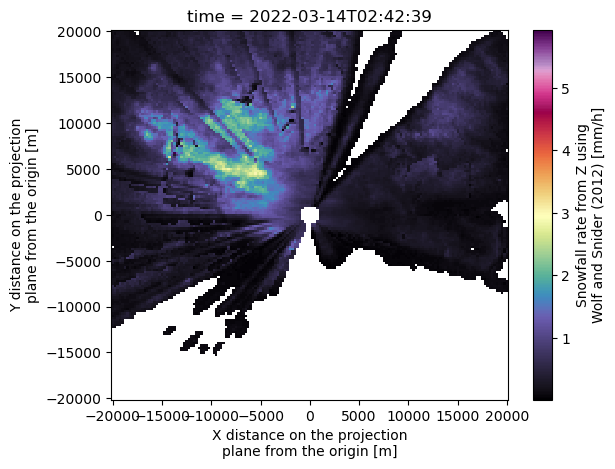

In [8]:
squire_ds.snow_rate_ws2012.plot(cmap='ChaseSpectral');

By default, the axes are the x/y distance from the radar. Latitude and longitude information would be more helpful here!

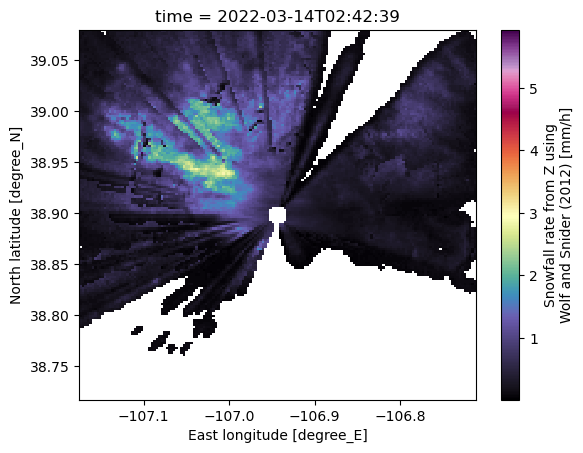

In [9]:
squire_ds.snow_rate_ws2012.plot(x='lon',
                                y='lat',
                                cmap='ChaseSpectral');

## Compare with Weighted Rain Gauge Data
We are interested in a weighted rain bucket gauge located near the main site (M1), with the specific instrument being the pluvio. We use the following block of code to access the `.a1` data, which has not been fully corrected.

In [10]:
arm_username = os.getenv("ARM_USERNAME")
arm_password = os.getenv("ARM_PASSWORD")

datastream = "gucwbpluvio2M1.a1"

start_date = "2022-03-14"
end_date = "2022-03-14"

files = act.discovery.download_arm_data(arm_username,
                                        arm_password,
                                        datastream,
                                        start_date,
                                        end_date)
files

[DOWNLOADING] gucwbpluvio2M1.a1.20220314.000000.nc

If you use these data to prepare a publication, please cite:

Wang, D., Jane, M., Cromwell, E., Sturm, M., Irving, K., Delamere, J., &
Mockaitis, M. Weighing Bucket Precipitation Gauge (WBPLUVIO2). Atmospheric
Radiation Measurement (ARM) User Facility. https://doi.org/10.5439/1338194



['/Users/atheisen/Code/ARM-Notebooks/VAPs/squire/gucwbpluvio2M1.a1/gucwbpluvio2M1.a1.20220314.000000.nc']

After we download the file, we can load it into our notebook using the ACT library, leveraging xarray under the hood.

In [11]:
gauge_ds = act.io.read_arm_netcdf(files)
gauge_ds

<xarray.Dataset>
Dimensions:           (time: 1440)
Coordinates:
  * time              (time) datetime64[ns] 2022-03-14 ... 2022-03-14T23:59:00
Data variables: (12/22)
    base_time         datetime64[ns] 2022-03-14
    time_offset       (time) datetime64[ns] 2022-03-14 ... 2022-03-14T23:59:00
    intensity_rt      (time) float32 dask.array<chunksize=(1440,), meta=np.ndarray>
    accum_rtnrt       (time) float32 dask.array<chunksize=(1440,), meta=np.ndarray>
    accum_nrt         (time) float32 dask.array<chunksize=(1440,), meta=np.ndarray>
    accum_total_nrt   (time) float32 dask.array<chunksize=(1440,), meta=np.ndarray>
    ...                ...
    volt_min          (time) float32 dask.array<chunksize=(1440,), meta=np.ndarray>
    ptemp             (time) float32 dask.array<chunksize=(1440,), meta=np.ndarray>
    intensity_rtnrt   (time) float32 dask.array<chunksize=(1440,), meta=np.ndarray>
    lat               float32 ...
    lon               float32 ...
    alt               float32 ...
Attributes: (12/19)
    command_line:          wbpluvio2_ingest -s guc -f M1
    Conventions:           ARM-1.2
    process_version:       ingest-wbpluvio2-1.1-0.el7
    dod_version:           wbpluvio2-a1-1.0
    input_source:          /data/collection/guc/gucwbpluvio2M1.00/DL2.wbpluvi...
    site_id:               guc
    ...                    ...
    doi:                   10.5439/1338194
    history:               created by user dsmgr on machine flint at 2022-03-...
    _file_dates:           ['20220314']
    _file_times:           ['000000']
    _datastream:           gucwbpluvio2M1.a1
    _arm_standards_flag:   1

### Visualize Where the Rain Gauge is Located
The gauge dataset has latitude/longitude information encoded as variables! We can use this information to plot it on the map.

In [12]:
gauge_lat = gauge_ds.lat.values
gauge_lon = gauge_ds.lon.values
(gauge_lat, gauge_lon)

(array(38.956158, dtype=float32), array(-106.987854, dtype=float32))

Now that we have our gauge location, we can plot with the snow rate data!

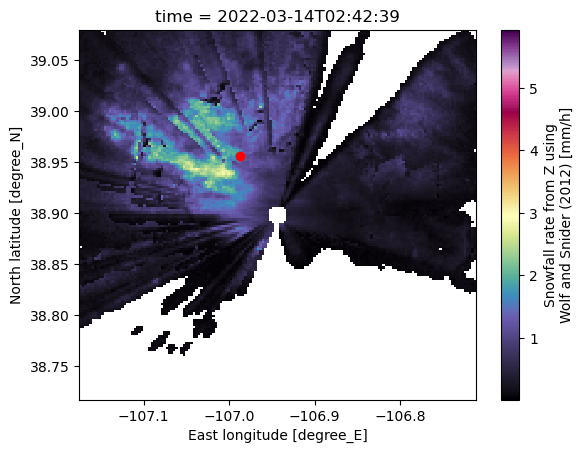

In [13]:
squire_ds.snow_rate_ws2012.plot(x='lon',
                                y='lat',
                                cmap='ChaseSpectral');
plt.scatter(gauge_lon,
            gauge_lat,
            color='r');

### Subset the SQUIRE dataset for the Gauge Location
We have the location of the gauge, as well as liquid precipitation rates for the datasets. Let's compare them by **subsetting** the gauge location from the gridded dataset. We first need to apply data cleaning, swapping the dimensions x/y with lat/lon to make it easier to select our point of interest.

In [14]:
if "lat" not in squire_ds.dims:
    squire_ds = squire_ds.swap_dims({'y': 'lat',
                                     'x': 'lon'})

Once we have dataset location, we use the `.sel()` method to extract the closest grid point to the gauge location.

In [15]:
squire_at_gauge = squire_ds.sel(lat=gauge_lat,
                                lon=gauge_lon,
                                method='nearest').compute()
squire_at_gauge

<xarray.Dataset>
Dimensions:                 (time: 1)
Coordinates:
  * time                    (time) datetime64[ns] 2022-03-14T02:42:39
    lat                     float64 38.96
    y                       float64 6.5e+03
    lon                     float64 -107.0
    x                       float64 -3.75e+03
    z                       (time) float64 500.0
Data variables:
    DBZ                     (time) float64 24.95
    corrected_reflectivity  (time) float64 24.95
    rain_rate_A             (time) float64 0.0
    snow_rate_ws88diw       (time) float64 2.827
    snow_rate_m2009_1       (time) float64 3.421
    snow_rate_m2009_2       (time) float64 2.113
    snow_rate_ws2012        (time) float64 1.705
    lowest_height           (time) float64 500.0
Attributes: (12/24)
    command_line:          python run_squire.py
    Conventions:           ARM-1.3 CF/Radial instrument_parameters
    process_version:       SQUIRE 1.0
    dod_version:           xprecipradarsquire-c1-1.0
    site_id:               guc
    platform_id:           xprecipradarsquire
    ...                    ...
    mentors:               https://www.arm.gov/connect-with-arm/organization/...
    source:                Colorado State University's X-Band Precipitation R...
    input_datastreams:     gucxprecipradarcmacppiS2.c1
    fields:                DBZ, corrected_reflectivity, time, lowest_height, ...
    history:               created by mgrover4 on Cumulus at 2023-02-06 19:10...
    DOD:                   gucxprecipradarsquire.c1

<div class="admonition alert alert-success">
    <p class="admonition-title" style="font-weight:bold">We did it!</p>
    We successfully extracted precipitation rates for our site!
</div>

### Plot our Results
The last step is to plot our results. We first define which color to plot our different relationships using a dictionary! then, we setup a figure and plot our features.

In [16]:
color_dict = {"snow_rate_ws88diw": "tab:green",
              "snow_rate_m2009_1": "tab:orange",
              "snow_rate_m2009_2": "tab:blue",
              "snow_rate_ws2012": "tab:red"}

In [17]:
volume_scan_time = "2022-03-14T02:41:00.000000000"

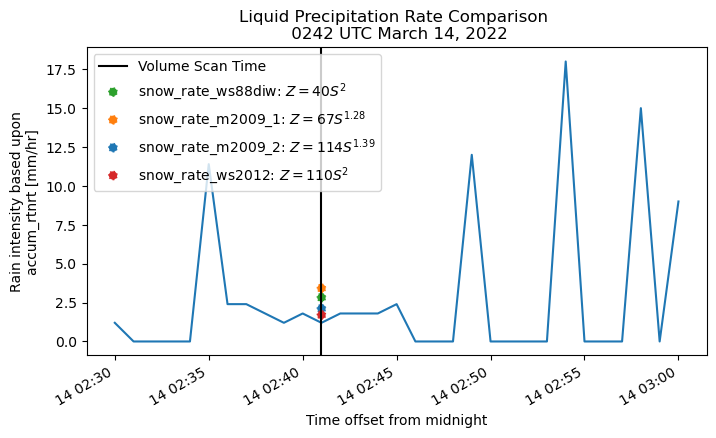

In [18]:
fig = plt.figure(figsize=(8,4))
ax = plt.subplot(111)

# Plot the 30-minute time of interest
gauge_ds.sel(time=slice('2022-03-14T02:30:00.000000000',
                  '2022-03-14T03:00:00.000000000')
      ).intensity_rtnrt.plot(ax=ax)

ax.axvline(volume_scan_time,
            label='Volume Scan Time',
            color='k'
          )

# Plot each Z(S) relationship as a horizontal line
for variable in list(squire_at_gauge.variables):
    if "snow_rate" in variable:
        z_s = f"{variable}: $Z = {squire_ds[variable].A}S^" + "{" + f"{squire_ds[variable].B}" + "}$"
        ax.scatter(volume_scan_time,
                   squire_at_gauge[variable],
                   label=z_s,
                   color=color_dict[variable],
                   linestyle=":")

plt.legend()
plt.title("Liquid Precipitation Rate Comparison \n 0242 UTC March 14, 2022");

<div class="admonition alert alert-danger">
    <p class="admonition-title" style="font-weight:bold">Danger</p>
    Be careful - this is not a definitive comparison, more case comparisons/case studies are required to understand which Z(S) relationship performed the best
</div>

---

## Summary
In this notebook, we explored the SQUIRE dataset, which is a Value-Added product produced by the ARM program. This dataset is helpful with the SAIL field campaign, especially for those interested in precipitation estimates near complex terrain.

We plotted data from a single case, and compared with nearby observations to estimate how well the precipitation rates compare.

## Resources and references
* [SQUIRE Documentation](https://www.arm.gov/capabilities/science-data-products/vaps/squire)
* [SQUIRE Technical Document](https://www.arm.gov/publications/tech_reports/doe-sc-arm-tr-287.pdf)
* Matrosov SY, C Campbell, D Kingsmill, and E Sukovich. 2009. “Assessing Snowfall Rates from X-Band Radar Reflectivity Measurements.” Journal of Atmospheric and Oceanic Technology, 26, 2324–2339, doi:10.1175/2009JTECHA1238.1

* Braham RR. 1990. “Snow Particle Size Spectra in Lake Effect Snows”. Journal of Applied Meteorology and Climatology, 29, 200–207, doi:10.1175/1520-0450(1990)029<0200:SPSSIL>2.0.CO;2.

* Helmus JJ and SM Collis. 2016. “The Python ARM Radar Toolkit (Py-ART), a Library for Working with Weather Radar Data in the Python Programming Language.” Journal of Open Research Software, 4(1), doi:10.5334/jors.119.